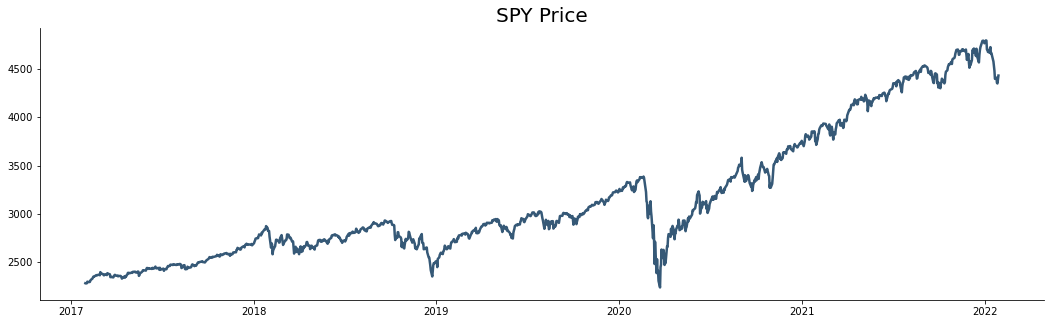

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from cycler import cycler

rcParams['figure.figsize'] = 18, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = 2.5


# Load
df1 = pd.read_csv('spy.csv', index_col='Date', parse_dates=True)
df1.drop(columns="Unnamed: 0", inplace=True)
# Visualize
plt.title('SPY Price', size=20)
plt.plot(df1);

In [2]:
df1


,Close
Date,
2017-01-30,2280.899902
2017-01-31,2278.870117
2017-02-01,2279.550049
2017-02-02,2280.850098
2017-02-03,2297.419922
...,...
2022-01-21,4397.939941
2022-01-24,4410.129883
2022-01-25,4356.450195


In [3]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, plot_confusion_matrix,\
    precision_score, recall_score, accuracy_score, f1_score, log_loss,\
    roc_curve, roc_auc_score, classification_report
from sklearn.metrics import mean_squared_error

In [4]:
df1

,Close
Date,
2017-01-30,2280.899902
2017-01-31,2278.870117
2017-02-01,2279.550049
2017-02-02,2280.850098
2017-02-03,2297.419922
...,...
2022-01-21,4397.939941
2022-01-24,4410.129883
2022-01-25,4356.450195


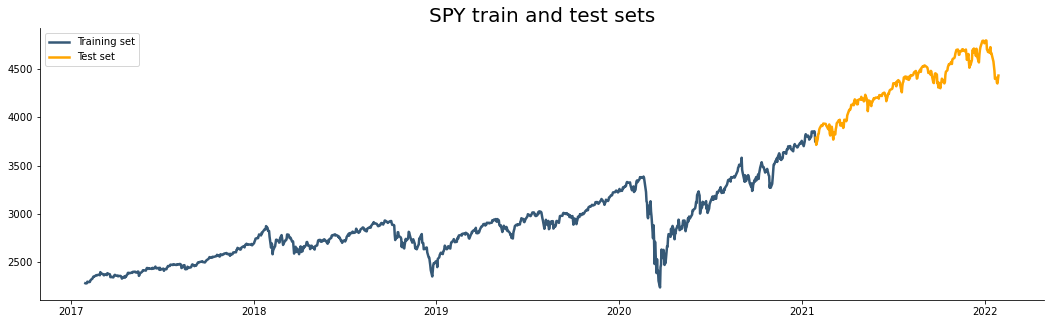

In [5]:
test_size1 = 253


df_train1 = df1[:-test_size1]
df_test1 = df1[-test_size1:]

plt.title('SPY train and test sets', size=20)
plt.plot(df_train1, label='Training set')
plt.plot(df_test1, label='Test set', color='orange')
plt.legend();

In [6]:
from fbprophet import Prophet as proph

In [7]:
df_train1

,Close
Date,
2017-01-30,2280.899902
2017-01-31,2278.870117
2017-02-01,2279.550049
2017-02-02,2280.850098
2017-02-03,2297.419922
...,...
2021-01-21,3853.070068
2021-01-22,3841.469971
2021-01-25,3855.360107


In [8]:
df_train1.reset_index(inplace=True)

In [9]:
df_test1

,Close
Date,
2021-01-28,3787.379883
2021-01-29,3714.239990
2021-02-01,3773.860107
2021-02-02,3826.310059
2021-02-03,3830.169922
...,...
2022-01-21,4397.939941
2022-01-24,4410.129883
2022-01-25,4356.450195


In [10]:
df_test1.reset_index(inplace=True)

In [11]:
# Rename the columns [Date,AAPL] to [ds, y]

ts1 = df_train1

ts1 = df_train1.rename(columns={'Date': 'ds',
                        'Close': 'y'})

ts_test1 = df_test1.rename(columns={'Date': 'ds',
                        'Close': 'y'})
ts1.head(5)


,ds,y
0,2017-01-30,2280.899902
1,2017-01-31,2278.870117
2,2017-02-01,2279.550049
3,2017-02-02,2280.850098
4,2017-02-03,2297.419922


In [12]:
x_test1 = ts_test1[['ds']]

In [13]:
# set the uncertainty interval to 95% (the Prophet default is 80%)

Model1 = proph(interval_width=0.95,daily_seasonality=True)

In [14]:
# Fit the timeseries into Model
Model1.fit(ts1)

In [15]:
# USe make_future_dataframe with a monthly frequency and periods = 759 for 3 years
future_dates1 = Model1.make_future_dataframe(periods=759, freq='D')
future_dates1.tail()


,ds
1760,2023-02-21
1761,2023-02-22
1762,2023-02-23
1763,2023-02-24
1764,2023-02-25


In [16]:
future_dates1

,ds
0,2017-01-30
1,2017-01-31
2,2017-02-01
3,2017-02-02
4,2017-02-03
...,...
1760,2023-02-21
1761,2023-02-22
1762,2023-02-23
1763,2023-02-24


In [17]:
future_dates1= future_dates1.loc[future_dates1['ds'] >= '2021-01-22']

In [18]:
x_test1 = pd.DataFrame(x_test1)

In [19]:
x_test1

,ds
0,2021-01-28
1,2021-01-29
2,2021-02-01
3,2021-02-02
4,2021-02-03
...,...
248,2022-01-21
249,2022-01-24
250,2022-01-25
251,2022-01-26


In [20]:
# Predict the values for future dates and take the head of forecast

predicitons1 = Model1.predict(x_test1)


In [21]:
forecast1 = Model1.predict(future_dates1)

In [22]:
forecast1.tail() 

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
758,2023-02-21,6319.589295,1563.665930,11121.030542,1455.370563,10982.951615,119.386638,119.386638,119.386638,33.903811,...,3.062481,3.062481,3.062481,82.420346,82.420346,82.420346,0.0,0.0,0.0,6438.975933
759,2023-02-22,6322.950320,1595.622769,11179.749456,1447.934693,10992.112373,118.201707,118.201707,118.201707,33.903811,...,2.472020,2.472020,2.472020,81.825876,81.825876,81.825876,0.0,0.0,0.0,6441.152027
760,2023-02-23,6326.311345,1580.151345,11111.529030,1445.266898,11001.273130,116.173416,116.173416,116.173416,33.903811,...,1.780763,1.780763,1.780763,80.488842,80.488842,80.488842,0.0,0.0,0.0,6442.484761
761,2023-02-24,6329.672370,1538.097063,11096.948162,1442.599103,11010.433887,114.297234,114.297234,114.297234,33.903811,...,2.054177,2.054177,2.054177,78.339246,78.339246,78.339246,0.0,0.0,0.0,6443.969604
762,2023-02-25,6333.033395,1475.563694,11179.877150,1439.931308,11019.594644,104.986854,104.986854,104.986854,33.903811,...,-4.237979,-4.237979,-4.237979,75.321022,75.321022,75.321022,0.0,0.0,0.0,6438.020249


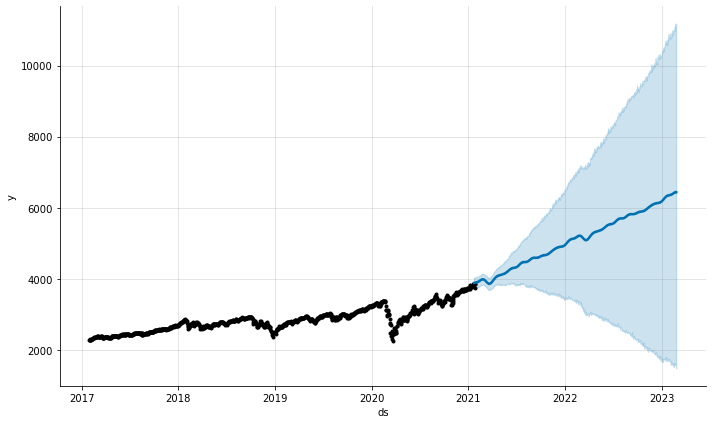

In [23]:
# Use prophet's plot function to plot the predictions

Model1.plot(forecast1, uncertainty=True)
plt.show()

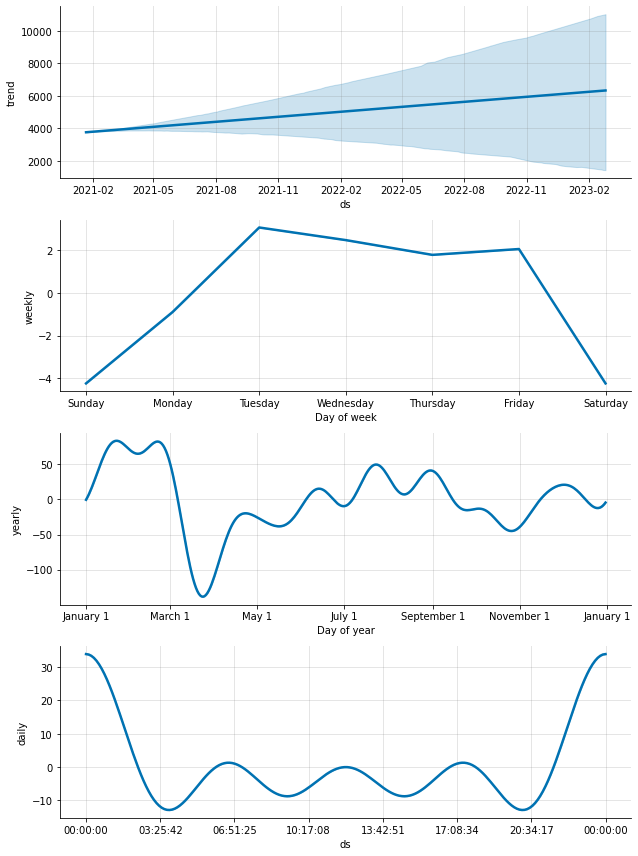

In [24]:
Model1.plot_components(forecast1)
plt.show()

In [25]:
df_test1 = pd.concat([df_test1,predicitons1], axis=1)
df_test1

,Date,Close,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-28,3787.379883,2021-01-28,3785.376406,3749.741284,4048.912944,3785.376406,3785.376406,113.128116,113.128116,...,1.780763,1.780763,1.780763,77.443542,77.443542,77.443542,0.0,0.0,0.0,3898.504522
1,2021-01-29,3714.239990,2021-01-29,3788.737431,3755.873986,4053.613733,3788.737431,3788.737431,111.527011,111.527011,...,2.054177,2.054177,2.054177,75.569023,75.569023,75.569023,0.0,0.0,0.0,3900.264442
2,2021-02-01,3773.860107,2021-02-01,3798.820506,3746.320624,4048.766424,3797.440161,3799.248712,103.024853,103.024853,...,-0.893485,-0.893485,-0.893485,70.014527,70.014527,70.014527,0.0,0.0,0.0,3901.845359
3,2021-02-02,3826.310059,2021-02-02,3802.181531,3765.748949,4060.228763,3800.133600,3803.685275,105.403679,105.403679,...,3.062481,3.062481,3.062481,68.437387,68.437387,68.437387,0.0,0.0,0.0,3907.585211
4,2021-02-03,3830.169922,2021-02-03,3805.542557,3759.857668,4052.429240,3802.156475,3807.944303,103.483724,103.483724,...,2.472020,2.472020,2.472020,67.107893,67.107893,67.107893,0.0,0.0,0.0,3909.026280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,2022-01-21,4397.939941,2022-01-21,4988.623375,3455.343478,6749.107875,3360.728096,6634.159572,118.811971,118.811971,...,2.054177,2.054177,2.054177,82.853983,82.853983,82.853983,0.0,0.0,0.0,5107.435346
249,2022-01-24,4410.129883,2022-01-24,4998.706450,3472.645309,6795.537146,3346.253638,6659.557397,116.128716,116.128716,...,-0.893485,-0.893485,-0.893485,83.118390,83.118390,83.118390,0.0,0.0,0.0,5114.835166
250,2022-01-25,4356.450195,2022-01-25,5002.067475,3462.614904,6811.842424,3341.453234,6666.694840,119.255665,119.255665,...,3.062481,3.062481,3.062481,82.289373,82.289373,82.289373,0.0,0.0,0.0,5121.323140
251,2022-01-26,4349.930176,2022-01-26,5005.428500,3453.228165,6783.468092,3336.652830,6676.181210,117.471485,117.471485,...,2.472020,2.472020,2.472020,81.095654,81.095654,81.095654,0.0,0.0,0.0,5122.899985


In [26]:
forecast1

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-22,3765.210256,3749.621310,4026.332839,3765.210256,3765.210256,119.470796,119.470796,119.470796,33.903811,...,2.054177,2.054177,2.054177,83.512808,83.512808,83.512808,0.0,0.0,0.0,3884.681052
1,2021-01-25,3775.293331,3740.860900,4036.907670,3775.293331,3775.293331,115.032883,115.032883,115.032883,33.903811,...,-0.893485,-0.893485,-0.893485,82.022557,82.022557,82.022557,0.0,0.0,0.0,3890.326214
2,2021-01-26,3778.654356,3731.718120,4041.342683,3778.654356,3778.654356,117.714478,117.714478,117.714478,33.903811,...,3.062481,3.062481,3.062481,80.748186,80.748186,80.748186,0.0,0.0,0.0,3896.368834
3,2021-01-27,3782.015381,3739.213122,4051.613312,3782.015381,3782.015381,115.572279,115.572279,115.572279,33.903811,...,2.472020,2.472020,2.472020,79.196448,79.196448,79.196448,0.0,0.0,0.0,3897.587660
4,2021-01-28,3785.376406,3750.632843,4035.736732,3785.376406,3785.376406,113.128116,113.128116,113.128116,33.903811,...,1.780763,1.780763,1.780763,77.443542,77.443542,77.443542,0.0,0.0,0.0,3898.504522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758,2023-02-21,6319.589295,1563.665930,11121.030542,1455.370563,10982.951615,119.386638,119.386638,119.386638,33.903811,...,3.062481,3.062481,3.062481,82.420346,82.420346,82.420346,0.0,0.0,0.0,6438.975933
759,2023-02-22,6322.950320,1595.622769,11179.749456,1447.934693,10992.112373,118.201707,118.201707,118.201707,33.903811,...,2.472020,2.472020,2.472020,81.825876,81.825876,81.825876,0.0,0.0,0.0,6441.152027
760,2023-02-23,6326.311345,1580.151345,11111.529030,1445.266898,11001.273130,116.173416,116.173416,116.173416,33.903811,...,1.780763,1.780763,1.780763,80.488842,80.488842,80.488842,0.0,0.0,0.0,6442.484761
761,2023-02-24,6329.672370,1538.097063,11096.948162,1442.599103,11010.433887,114.297234,114.297234,114.297234,33.903811,...,2.054177,2.054177,2.054177,78.339246,78.339246,78.339246,0.0,0.0,0.0,6443.969604


In [27]:
mean_squared_error(df_test1.Close,df_test1.yhat,squared=False)

187.27406867415917

In [28]:
df2 = forecast1[['ds','yhat']]
df2

,ds,yhat
0,2021-01-22,3884.681052
1,2021-01-25,3890.326214
2,2021-01-26,3896.368834
3,2021-01-27,3897.587660
4,2021-01-28,3898.504522
...,...,...
758,2023-02-21,6438.975933
759,2023-02-22,6441.152027
760,2023-02-23,6442.484761
761,2023-02-24,6443.969604


,ds,y
0,2017-01-30,2280.899902
1,2017-01-31,2278.870117
2,2017-02-01,2279.550049
3,2017-02-02,2280.850098
4,2017-02-03,2297.419922
...,...,...
1001,2021-01-21,3853.070068
1002,2021-01-22,3841.469971
1003,2021-01-25,3855.360107
1004,2021-01-26,3849.620117
